In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
path_data='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/combined/'

In [3]:
# Saving figures
path_fig='/lustre/groups/ml01/workspace/karin.hrovatin/data/pancreas/figures/paper/'
sc._settings.ScanpyConfig.figdir=Path(path_fig)

In [4]:
adata_rn_b=sc.read(path_data+'data_rawnorm_integrated_analysed_beta_v1s1_sfintegrated.h5ad')
adata_rn_b.shape

(102143, 30672)

In [50]:
# Make df for seaborn - with info on expression, reporter, sample, and dataset
is_fltp=adata_rn_b.obs.study.str.contains('Fltp')
eid=adata_rn_b.var.query('gene_symbol=="Cfap126"').index[0]
df_plot=adata_rn_b[is_fltp,eid].to_df()
df_plot.columns=['Cfap126']
df_plot['dataset']=adata_rn_b[is_fltp,:].obs['study_parsed']
df_plot['sample']=adata_rn_b[is_fltp,:].obs['design']
df_plot['sample']=pd.Categorical(
    df_plot['sample'],
    ['mRFP','mTmG','mGFP', 'head_Fltp-','tail_Fltp-', 'head_Fltp+', 'tail_Fltp+',
    ],ordered=True)
df_plot=df_plot.sort_values(['dataset','sample'])
df_plot['sample']=df_plot['sample'].astype(str)
df_plot['Fltp reporter']=df_plot['sample'].map(
     {'mRFP':'negative','mTmG':'transient','mGFP':'positive', 
     'head_Fltp-':'negative','tail_Fltp-':'negative', 
     'head_Fltp+':'positive', 'tail_Fltp+':'positive',
     })

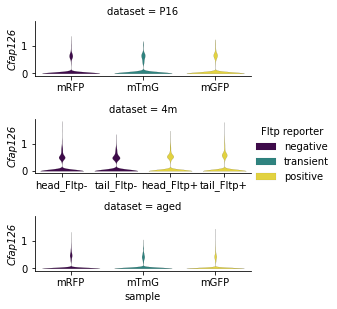

In [64]:
# Plot
palette={'negative':'#440154','transient':'#21918c','positive':'#fde725'}
g=sb.catplot(
    data=df_plot, x="sample", y="Cfap126",  kind="violin", inner=None, row='dataset',
    sharex=False,height=1.4, aspect=2.5,cut=0,hue='Fltp reporter',palette=palette,dodge=False,
    linewidth=0.1
)
# Set italic ylabels
[ax[0].set_ylabel(ax[0].get_ylabel(),style='italic') for ax in g.axes]
plt.savefig(path_fig+'violin_beta_Fltp_expr_sample.png',dpi=300,bbox_inches='tight')